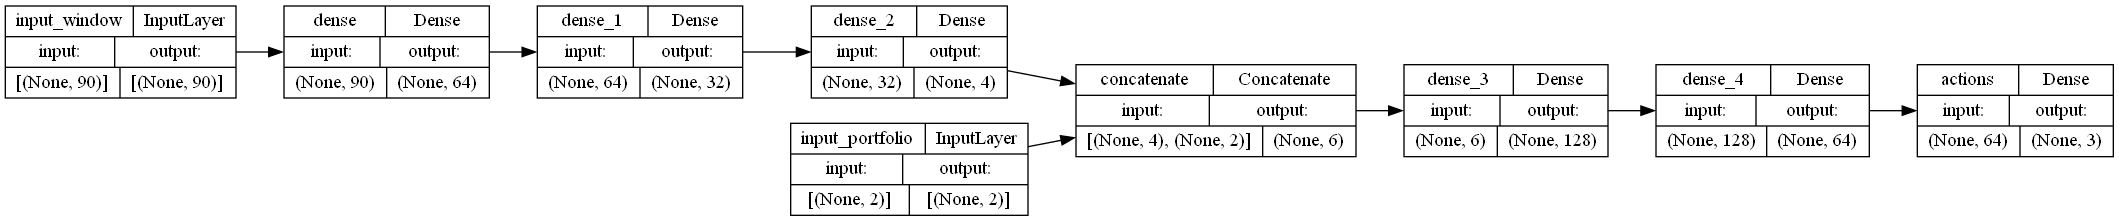

In [1]:
import tensorflow as tf

input_portfolio = tf.keras.Input(shape=(2), name="input_portfolio")
# The other will be the prices of the last window_size days
input_window = tf.keras.Input(shape=(90), name="input_window")

window = tf.keras.layers.Dense(64, activation="relu")(input_window)
window = tf.keras.layers.Dense(32, activation="relu")(window)
window = tf.keras.layers.Dense(4, activation="relu")(window)

combined = tf.keras.layers.Concatenate()([window, input_portfolio])
combined = tf.keras.layers.Dense(128, activation="relu")(combined)
combined = tf.keras.layers.Dense(64, activation="relu")(combined)

output = tf.keras.layers.Dense(3, activation="softmax", name="actions")(combined)

model = tf.keras.Model(inputs=[input_portfolio, input_window], outputs=output)
model.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR", to_file="model.png")

In [2]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_window (InputLayer)      [(None, 90)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           5824        ['input_window[0][0]']           
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 4)            132         ['dense_1[0][0]']                
                                                                                              